# Spotify Library Explorer

Interactive exploration of your merged Spotify playlists.

**Data:** 14,094 unique tracks from 19,514 entries (27.8% duplicates removed)

In [1]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to database
conn = duckdb.connect('../data/spotify.duckdb', read_only=True)

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 60)
pd.set_option('display.max_rows', 100)

# Plot style
plt.style.use('dark_background')
sns.set_palette('husl')

print('Connected to database!')

Connected to database!


## Quick Stats

In [2]:
stats = conn.execute("""
    SELECT 
        COUNT(*) as total_entries,
        COUNT(DISTINCT id) as unique_tracks,
        COUNT(DISTINCT artist_id) as unique_artists,
        COUNT(DISTINCT album_id) as unique_albums,
        ROUND(SUM(duration_ms) / 3600000.0, 1) as total_hours,
        ROUND(AVG(popularity), 1) as avg_popularity
    FROM tracks
""").fetchdf()

stats

,total_entries,unique_tracks,unique_artists,unique_albums,total_hours,avg_popularity
0,19514,14094,2965,12393,1052.1,19.4


## Top Weighted Tracks (Your Favorites)

In [4]:
top_weighted = conn.execute("""
    SELECT 
        name as Track,
        artist as Artist,
        COUNT(*) as Weight,
        'https://open.spotify.com/track/' || id as URL
    FROM tracks
    GROUP BY id, name, artist
    HAVING COUNT(*) > 1
    ORDER BY Weight DESC
    LIMIT 30
""").fetchdf()

top_weighted

,Track,Artist,Weight,URL
0,The Hard Way,Inpulsa,15,https://open.spotify.com/track/53jcghySzxq7Hbp1pmC8vD
1,The Soul,Atmozfears,14,https://open.spotify.com/track/7EOZRhI98MiZQXJI8bNIKQ
2,Reflections,D-Sturb,14,https://open.spotify.com/track/4yuqtzwV5flMo1HkXOMSu1
3,Text to Speech,Anderex,12,https://open.spotify.com/track/4veKFxkoTtCF8esUSY1bo0
4,Start a Moshpit,Re-Fuzz,12,https://open.spotify.com/track/5vEVNu6kbKP86hGaBf6uvs
5,Ons Leven (X-Qlusive Holland 2022 Anthem),Outsiders,12,https://open.spotify.com/track/1hS3qIgv8GkcK9kh33bfFK
6,Rave Is Religion,Audiofreq,12,https://open.spotify.com/track/7tnK1k3TRTkyXoJowN8cZ8
7,Aguila,Tears Of Fury,12,https://open.spotify.com/track/3iZGBhU96lWp6pZSpiisIr
8,Taste The Blade,Warface,12,https://open.spotify.com/track/2z6CtAg9x6hCT064WKnxWF
9,Enter The Dome - Official Thunderdome 2022 Anthem,N-Vitral,11,https://open.spotify.com/track/5wvfLTKIewrRfrZJRs3Qqf


## Top Artists

In [5]:
top_artists = conn.execute("""
    SELECT 
        artist as Artist,
        COUNT(DISTINCT id) as Tracks,
        COUNT(*) as Entries,
        'https://open.spotify.com/artist/' || artist_id as URL
    FROM tracks
    GROUP BY artist, artist_id
    ORDER BY Tracks DESC
    LIMIT 30
""").fetchdf()

top_artists

,Artist,Tracks,Entries,URL
0,Warface,126,288,https://open.spotify.com/artist/1wuQQfTDZhgNb4GJyhThUs
1,Rebelion,99,146,https://open.spotify.com/artist/5JcSyYpBdqCmjJyVlKh7Yg
2,E-Force,82,110,https://open.spotify.com/artist/77faXTf6wXs3L2CVol0c8C
3,Thyron,81,96,https://open.spotify.com/artist/75jOSvJYkVT21xz5yll1xM
4,Sub Zero Project,78,120,https://open.spotify.com/artist/4f0OXMMSxr0r8Ztx6CdpAl
5,Hard Driver,75,126,https://open.spotify.com/artist/1rpLzYzfrueWdkpcIunZQl
6,Rejecta,75,150,https://open.spotify.com/artist/2lmihUu4FzVOepdJpDDrof
7,Ran-D,75,118,https://open.spotify.com/artist/7IeovKzVkfcG9mIJGNzTcT
8,Gunz For Hire,74,173,https://open.spotify.com/artist/0WbAxASsYdodSlqwserDAW
9,D-Sturb,73,139,https://open.spotify.com/artist/7E6DrjKJieOdJKO8mbwCMO


## Release Year Distribution

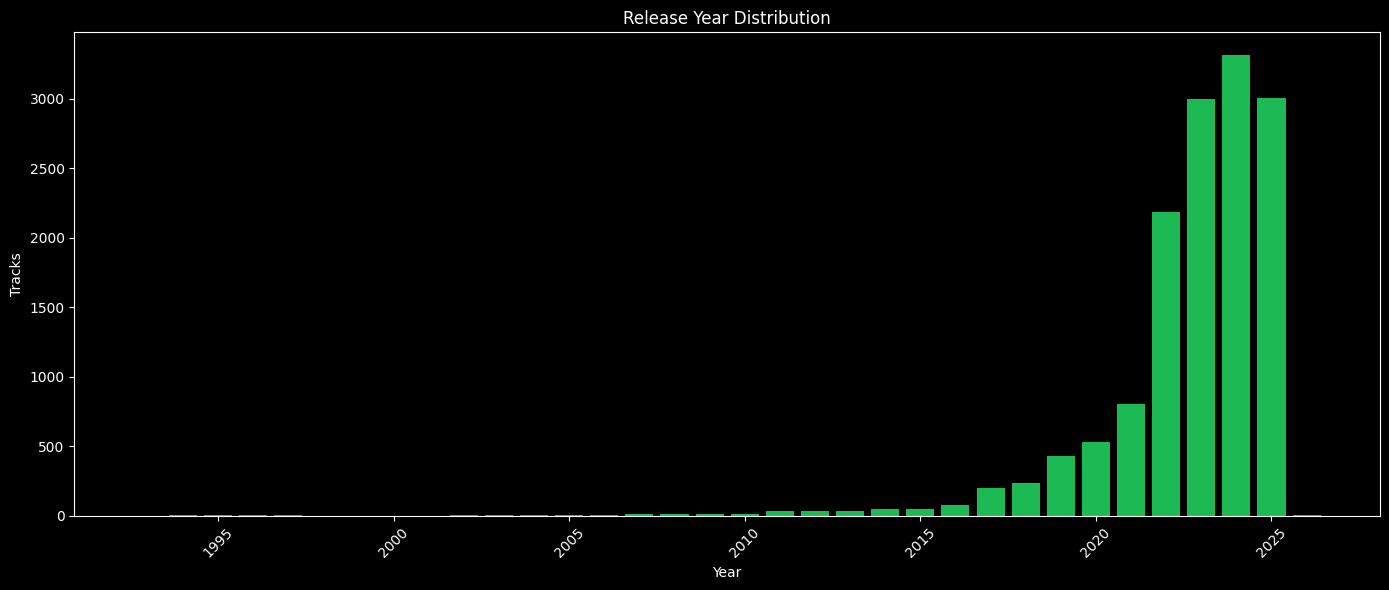

In [6]:
years = conn.execute("""
    SELECT 
        CAST(SUBSTR(release_date, 1, 4) AS INTEGER) as year,
        COUNT(DISTINCT id) as tracks
    FROM tracks
    WHERE release_date IS NOT NULL 
      AND SUBSTR(release_date, 1, 4) != '0000'
    GROUP BY year
    HAVING year >= 1990
    ORDER BY year
""").fetchdf()

fig, ax = plt.subplots(figsize=(14, 6))
ax.bar(years['year'], years['tracks'], color='#1DB954')
ax.set_xlabel('Year')
ax.set_ylabel('Tracks')
ax.set_title('Release Year Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Popularity Distribution

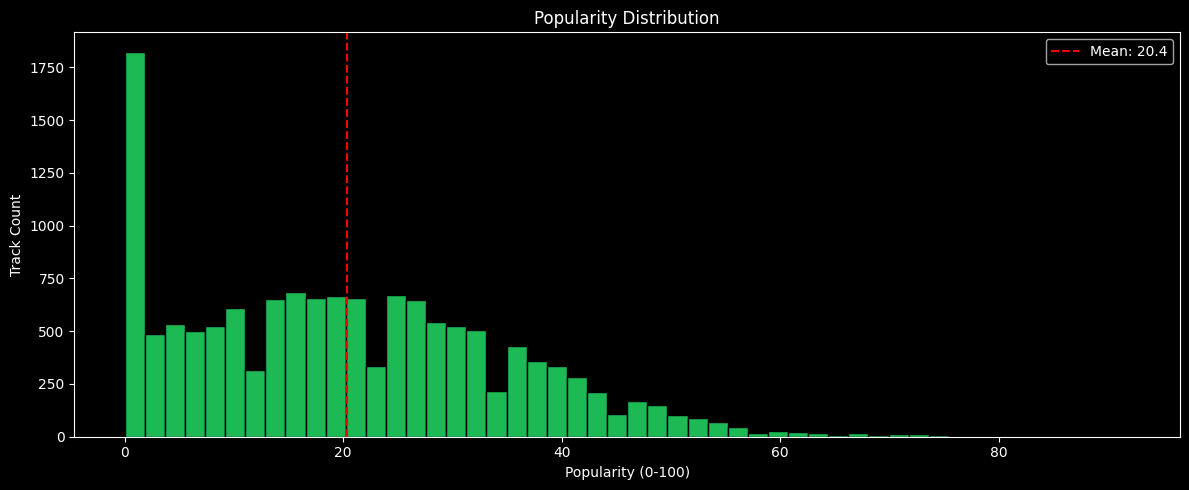

In [7]:
popularity = conn.execute("""
    SELECT DISTINCT id, popularity
    FROM tracks
    WHERE popularity IS NOT NULL
""").fetchdf()

fig, ax = plt.subplots(figsize=(12, 5))
ax.hist(popularity['popularity'], bins=50, color='#1DB954', edgecolor='black')
ax.set_xlabel('Popularity (0-100)')
ax.set_ylabel('Track Count')
ax.set_title('Popularity Distribution')
ax.axvline(popularity['popularity'].mean(), color='red', linestyle='--', label=f'Mean: {popularity["popularity"].mean():.1f}')
ax.legend()
plt.tight_layout()
plt.show()

## Track Duration Distribution

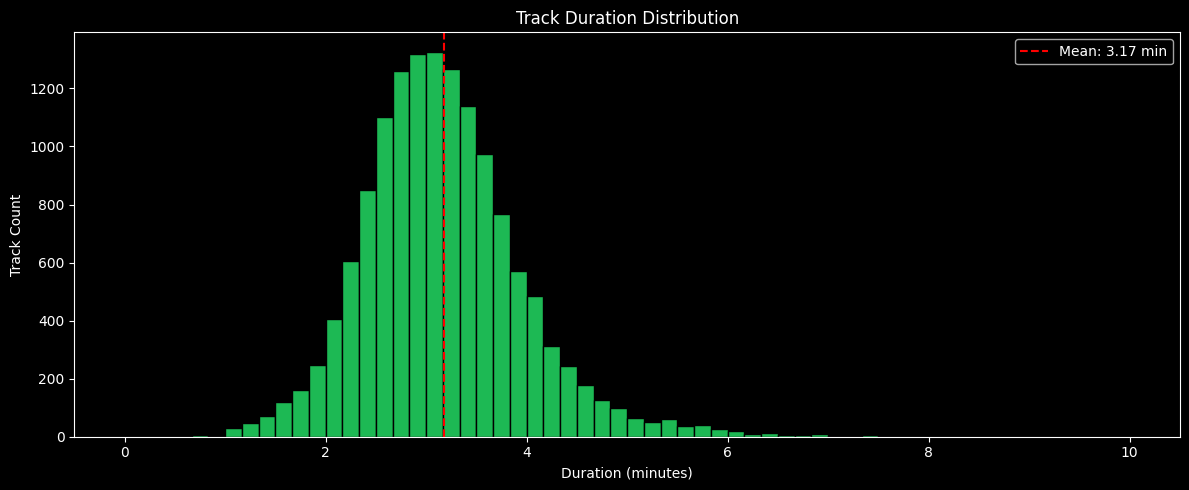

In [8]:
durations = conn.execute("""
    SELECT DISTINCT id, duration_ms / 60000.0 as duration_min
    FROM tracks
    WHERE duration_ms > 0
""").fetchdf()

fig, ax = plt.subplots(figsize=(12, 5))
ax.hist(durations['duration_min'], bins=60, range=(0, 10), color='#1DB954', edgecolor='black')
ax.set_xlabel('Duration (minutes)')
ax.set_ylabel('Track Count')
ax.set_title('Track Duration Distribution')
ax.axvline(durations['duration_min'].mean(), color='red', linestyle='--', label=f'Mean: {durations["duration_min"].mean():.2f} min')
ax.legend()
plt.tight_layout()
plt.show()

## Search for Tracks

In [9]:
# Change this to search for any track/artist
SEARCH = "Warface"

results = conn.execute(f"""
    SELECT DISTINCT
        name as Track,
        artist as Artist,
        album as Album,
        SUBSTR(release_date, 1, 4) as Year,
        'https://open.spotify.com/track/' || id as URL
    FROM tracks
    WHERE LOWER(name) LIKE LOWER('%{SEARCH}%')
       OR LOWER(artist) LIKE LOWER('%{SEARCH}%')
    ORDER BY artist, name
    LIMIT 50
""").fetchdf()

print(f"Found {len(results)} tracks matching '{SEARCH}'")
results

Found 50 tracks matching 'Warface'


,Track,Artist,Album,Year,URL
0,Aladdin On E - Warface Remix,Coone,Loyalty Is Everything,2021,https://open.spotify.com/track/2SNwt78bwwfAXhQV0yfdFs
1,We Don't Stop (Lights Out) - Warface Remix,D-Block & S-te-Fan,We Don't Stop (Lights Out) [Warface Remix],2021,https://open.spotify.com/track/07kV8Z7x0iKeHZgoi9AAam
2,Total Domination (Warface Remix) - Mix Cut,Donkey Rollers,Live For This 2,2017,https://open.spotify.com/track/4gEWrSTg1uKnxnJajg6OSA
3,Left With The Wrong (Warface Remix) - Mix Cut,Psyko Punkz,Live For This 2,2017,https://open.spotify.com/track/0v0fOEooFkBiNaWrqqBztx
4,DUSK TILL DAWN - WARFACE EDIT,Rebelion,The Second Dose,2023,https://open.spotify.com/track/03mvNyiJJOOnuzjt43V8Hp
5,RAMPAGE - WARFACE EDIT,Rebelion,The Second Dose,2023,https://open.spotify.com/track/2ce21NCGQoaBZt3xUKLI5h
6,Warface,T.M.O.,Warface,2025,https://open.spotify.com/track/4Bx8dNAfKVbFLUXEWRGKjc
7,Addicted,Warface,Vengeance,2018,https://open.spotify.com/track/5gBKC10SzeCkZRqoDe0vAg
8,All We Have Is Now - Official Live For This 2021 Anthem,Warface,Forgotten Future,2021,https://open.spotify.com/track/5zwc6GqrGAlJNqAdCiP5bw
9,All We Have Is Now - Official Live For This 2021 Anthem,Warface,All We Have Is Now (Official Live For This 2021 Anthem),2021,https://open.spotify.com/track/2qWHPBWvhaEDlkThkx0Gws


## Custom SQL Query

Run any SQL query against the database.

In [10]:
# Write your own SQL query here
custom_query = """
SELECT 
    artist,
    COUNT(DISTINCT id) as tracks,
    ROUND(AVG(popularity), 1) as avg_popularity,
    ROUND(AVG(duration_ms) / 60000.0, 2) as avg_duration_min
FROM tracks
GROUP BY artist
HAVING COUNT(DISTINCT id) >= 10
ORDER BY avg_popularity DESC
LIMIT 20
"""

conn.execute(custom_query).fetchdf()

,artist,tracks,avg_popularity,avg_duration_min
0,Crankdat,10,46.0,3.32
1,Harris & Ford,16,43.6,3.14
2,Slaughterhouse,20,42.9,2.54
3,Dual Damage,24,41.6,2.98
4,Sickmode,43,41.5,3.27
5,Ogryzek,17,41.0,2.12
6,Dimitri K,38,40.3,2.72
7,Ghost Stories,11,39.2,3.31
8,TNT,19,38.7,3.39
9,Noiseflow,25,38.6,2.45


## Table Schema

Available columns in the `tracks` table:

In [11]:
conn.execute("DESCRIBE tracks").fetchdf()

,column_name,column_type,null,key,default,extra
0,id,VARCHAR,YES,None,None,None
1,name,VARCHAR,YES,None,None,None
2,artist,VARCHAR,YES,None,None,None
3,artist_id,VARCHAR,YES,None,None,None
4,album,VARCHAR,YES,None,None,None
5,album_id,VARCHAR,YES,None,None,None
6,release_date,VARCHAR,YES,None,None,None
7,duration_ms,INTEGER,YES,None,None,None
8,popularity,INTEGER,YES,None,None,None
9,explicit,BOOLEAN,YES,None,None,None


In [12]:
# Close connection when done
# conn.close()

In [13]:
import duckdb
import pandas as pd

# Connect to database
conn = duckdb.connect('../data/spotify.duckdb', read_only=True)

print('Connected to database!')

Connected to database!


In [14]:
conn.close()